# Leaderboard Generation

This notebook demonstrates how to create comprehensive performance leaderboards from benchmark results, showing how to rank estimators and generate publication-ready comparisons.

## Overview

The leaderboard generation system allows you to:

1. **Load Benchmark Results**: Import results from multiple benchmark runs
2. **Create Rankings**: Generate performance rankings across different metrics
3. **Composite Scoring**: Combine multiple metrics into overall scores
4. **Visualization**: Create publication-ready plots and tables
5. **Export Results**: Save leaderboards in various formats

## Table of Contents

1. [Setup and Imports](#setup)
2. [Loading Benchmark Results](#loading)
3. [Creating Performance Rankings](#rankings)
4. [Composite Scoring System](#scoring)
5. [Visualization and Export](#visualization)
6. [Summary and Next Steps](#summary)


## 1. Setup and Imports {#setup}

First, let's import all necessary libraries and set up the leaderboard generation system.


In [1]:
# Standard scientific computing importsimport numpy as np# LRDBenchmark imports - using simplified APIfrom lrdbenchmark import (    # Data models    FBMModel, FGNModel, ARFIMAModel, MRWModel, AlphaStableModel,    # Classical estimators      RSEstimator, DFAEstimator, GPHEstimator, WhittleEstimator,    # Machine Learning estimators    RandomForestEstimator, SVREstimator, GradientBoostingEstimator,    # Neural Network estimators    CNNEstimator, LSTMEstimator, GRUEstimator, TransformerEstimator,    # GPU utilities    gpu_is_available, get_device_info, clear_gpu_cache, monitor_gpu_memory)import pandas as pdimport matplotlib.pyplot as pltimport seaborn as snsfrom scipy import statsimport timeimport warningsimport subprocessimport gcwarnings.filterwarnings('ignore')# GPU Memory Management Functions

🔍 Checking GPU memory status...
🖥️  GPU Memory: 13MB / 8151MB (0.2%)
✅ All imports successful!
🏆 Ready to generate performance leaderboards


## 2. Loading Benchmark Results {#loading}

Let's run comprehensive benchmarks to generate data for our leaderboard, then load and process the results.


In [2]:
# Initialize benchmark system
print("🔧 Initializing Benchmark System for Leaderboard Generation...")
print("=" * 70)

benchmark = ComprehensiveBenchmark(output_dir="leaderboard_results")

# Run comprehensive benchmarks
print("\n🚀 Running Comprehensive Benchmarks...")
print("=" * 70)

# Run classical benchmark
print("📊 Running Classical Estimator Benchmark...")
classical_results = benchmark.run_classical_benchmark(
    data_length=1000,
    save_results=True
)

print(f"✅ Classical benchmark completed!")
print(f"Success rate: {classical_results['success_rate']:.1%}")
print(f"Total tests: {classical_results['total_tests']}")

# Run ML benchmark
print("\n📊 Running ML Estimator Benchmark...")
ml_results = benchmark.run_ml_benchmark(
    data_length=1000,
    save_results=True
)

print(f"✅ ML benchmark completed!")
print(f"Success rate: {ml_results['success_rate']:.1%}")
print(f"Total tests: {ml_results['total_tests']}")

# Run neural benchmark
print("\n📊 Running Neural Network Benchmark...")
neural_results = benchmark.run_neural_benchmark(
    data_length=1000,
    save_results=True
)

print(f"✅ Neural benchmark completed!")
print(f"Success rate: {neural_results['success_rate']:.1%}")
print(f"Total tests: {neural_results['total_tests']}")

# Run comprehensive benchmark
print("\n📊 Running Comprehensive Benchmark...")
comprehensive_results = benchmark.run_comprehensive_benchmark(
    data_length=1000,
    save_results=True
)

print(f"✅ Comprehensive benchmark completed!")
print(f"Success rate: {comprehensive_results['success_rate']:.1%}")
print(f"Total tests: {comprehensive_results['total_tests']}")

print("\n🎯 All benchmarks completed successfully!")


🔧 Initializing Benchmark System for Leaderboard Generation...
✅ LSTM model initialized with reasonable weights
✅ GRU model initialized with reasonable weights

🚀 Running Comprehensive Benchmarks...
📊 Running Classical Estimator Benchmark...
🚀 Starting LRDBench Benchmark
Benchmark Type: CLASSICAL
Testing 13 estimators...

📊 Testing with fBm data model...
   Generated 1000 clean data points
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
   🔍 Testing WaveletVar... ✅
   🔍 Testing WaveletLogVar... ✅
   🔍 Testing WaveletWhittle... ✅
   🔍 Testing MFDFA... ✅
   🔍 Testing WaveletLeaders... ✅

📊 Testing with fGn data model...
   Generated 1000 clean data points
   🔍 Testing R/S... ✅
   🔍 Testing DFA... ✅
   🔍 Testing DMA... ✅
   🔍 Testing Higuchi... ✅
   🔍 Testing GPH... ✅
   🔍 Testing Whittle... ✅
   🔍 Testing Periodogram... ✅
   🔍 Testing CWT... ✅
   

## 3. Creating Performance Rankings {#rankings}

Now let's create comprehensive performance rankings and leaderboards from our benchmark results.


In [ ]:
# Create comprehensive leaderboard
print("🏆 Creating Performance Leaderboard...")
print("=" * 70)

# Combine all benchmark results
all_results = {
    'Classical': classical_results,
    'ML': ml_results,
    'Neural': neural_results,
    'Comprehensive': comprehensive_results
}

# Create performance summary
performance_data = []

for category, results in all_results.items():
    print(f"🔍 Processing {category} results...")
    print(f"   Keys: {list(results.keys())}")
    
    # Check if results have the expected structure
    if 'results' in results and isinstance(results['results'], dict):
        print(f"   Found 'results' key with {len(results['results'])} entries")
        
        # Process the results data
        for data_model, model_results in results['results'].items():
            if isinstance(model_results, dict) and 'estimator_results' in model_results:
                for estimator_result in model_results['estimator_results']:
                    if estimator_result.get('success', True):  # Default to True if success not specified
                        performance_data.append({
                            'Category': category,
                            'Estimator': estimator_result['estimator'],
                            'True_H': estimator_result['true_hurst'],
                            'Estimated_H': estimator_result['estimated_hurst'],
                            'Error': estimator_result['error'],
                            'Execution_Time': estimator_result['execution_time'],
                            'Data_Model': data_model
                        })
    else:
        print(f"   ⚠️ Unexpected results structure for {category}")
        print(f"   Available keys: {list(results.keys())}")

print(f"\n📊 Total performance records collected: {len(performance_data)}")

# Create DataFrame
performance_df = pd.DataFrame(performance_data)

if len(performance_df) > 0:
    print(f"📊 Loaded {len(performance_df)} performance records")
    
    # Calculate performance metrics
    performance_metrics = performance_df.groupby(['Category', 'Estimator']).agg({
        'Error': ['mean', 'std', 'min', 'max'],
        'Execution_Time': ['mean', 'std'],
        'True_H': 'count'
    }).round(4)
    
    print("\n📈 Performance Metrics Summary:")
    print(performance_metrics)
    
    # Create overall leaderboard
    print("\n🏆 Overall Performance Leaderboard:")
    print("=" * 70)
    
    # Calculate composite scores
    leaderboard_data = []
    
    for (category, estimator), group in performance_df.groupby(['Category', 'Estimator']):
        mean_error = group['Error'].mean()
        std_error = group['Error'].std()
        mean_time = group['Execution_Time'].mean()
        count = len(group)
        
        # Composite score (lower is better for error, higher is better for count)
        composite_score = (1 / (1 + mean_error)) * (count / 10) * (1 / (1 + mean_time))
        
        leaderboard_data.append({
            'Category': category,
            'Estimator': estimator,
            'Mean_Error': mean_error,
            'Std_Error': std_error,
            'Mean_Time': mean_time,
            'Count': count,
            'Composite_Score': composite_score
        })
    
    leaderboard_df = pd.DataFrame(leaderboard_data)
    leaderboard_df = leaderboard_df.sort_values('Composite_Score', ascending=False)
    
    print(leaderboard_df.round(4))
    
    # Save leaderboard
    leaderboard_df.to_csv('outputs/performance_leaderboard.csv', index=False)
    print("\n💾 Leaderboard saved to outputs/performance_leaderboard.csv")
    
else:
    print("❌ No performance data available for leaderboard generation")


🏆 Creating Performance Leaderboard...
🔍 Processing Classical results...
   Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
   Found 'results' key with 4 entries
🔍 Processing ML results...
   Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
   Found 'results' key with 4 entries
🔍 Processing Neural results...
   Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_models_tested', 'estimators_tested', 'results']
   Found 'results' key with 4 entries
🔍 Processing Comprehensive results...
   Keys: ['timestamp', 'benchmark_type', 'contamination_type', 'contamination_level', 'total_tests', 'successful_tests', 'success_rate', 'data_mo

## 4. Visualization and Export {#visualization}

Let's create comprehensive visualizations of our leaderboard results and export them in various formats.


📊 Creating Performance Visualizations...


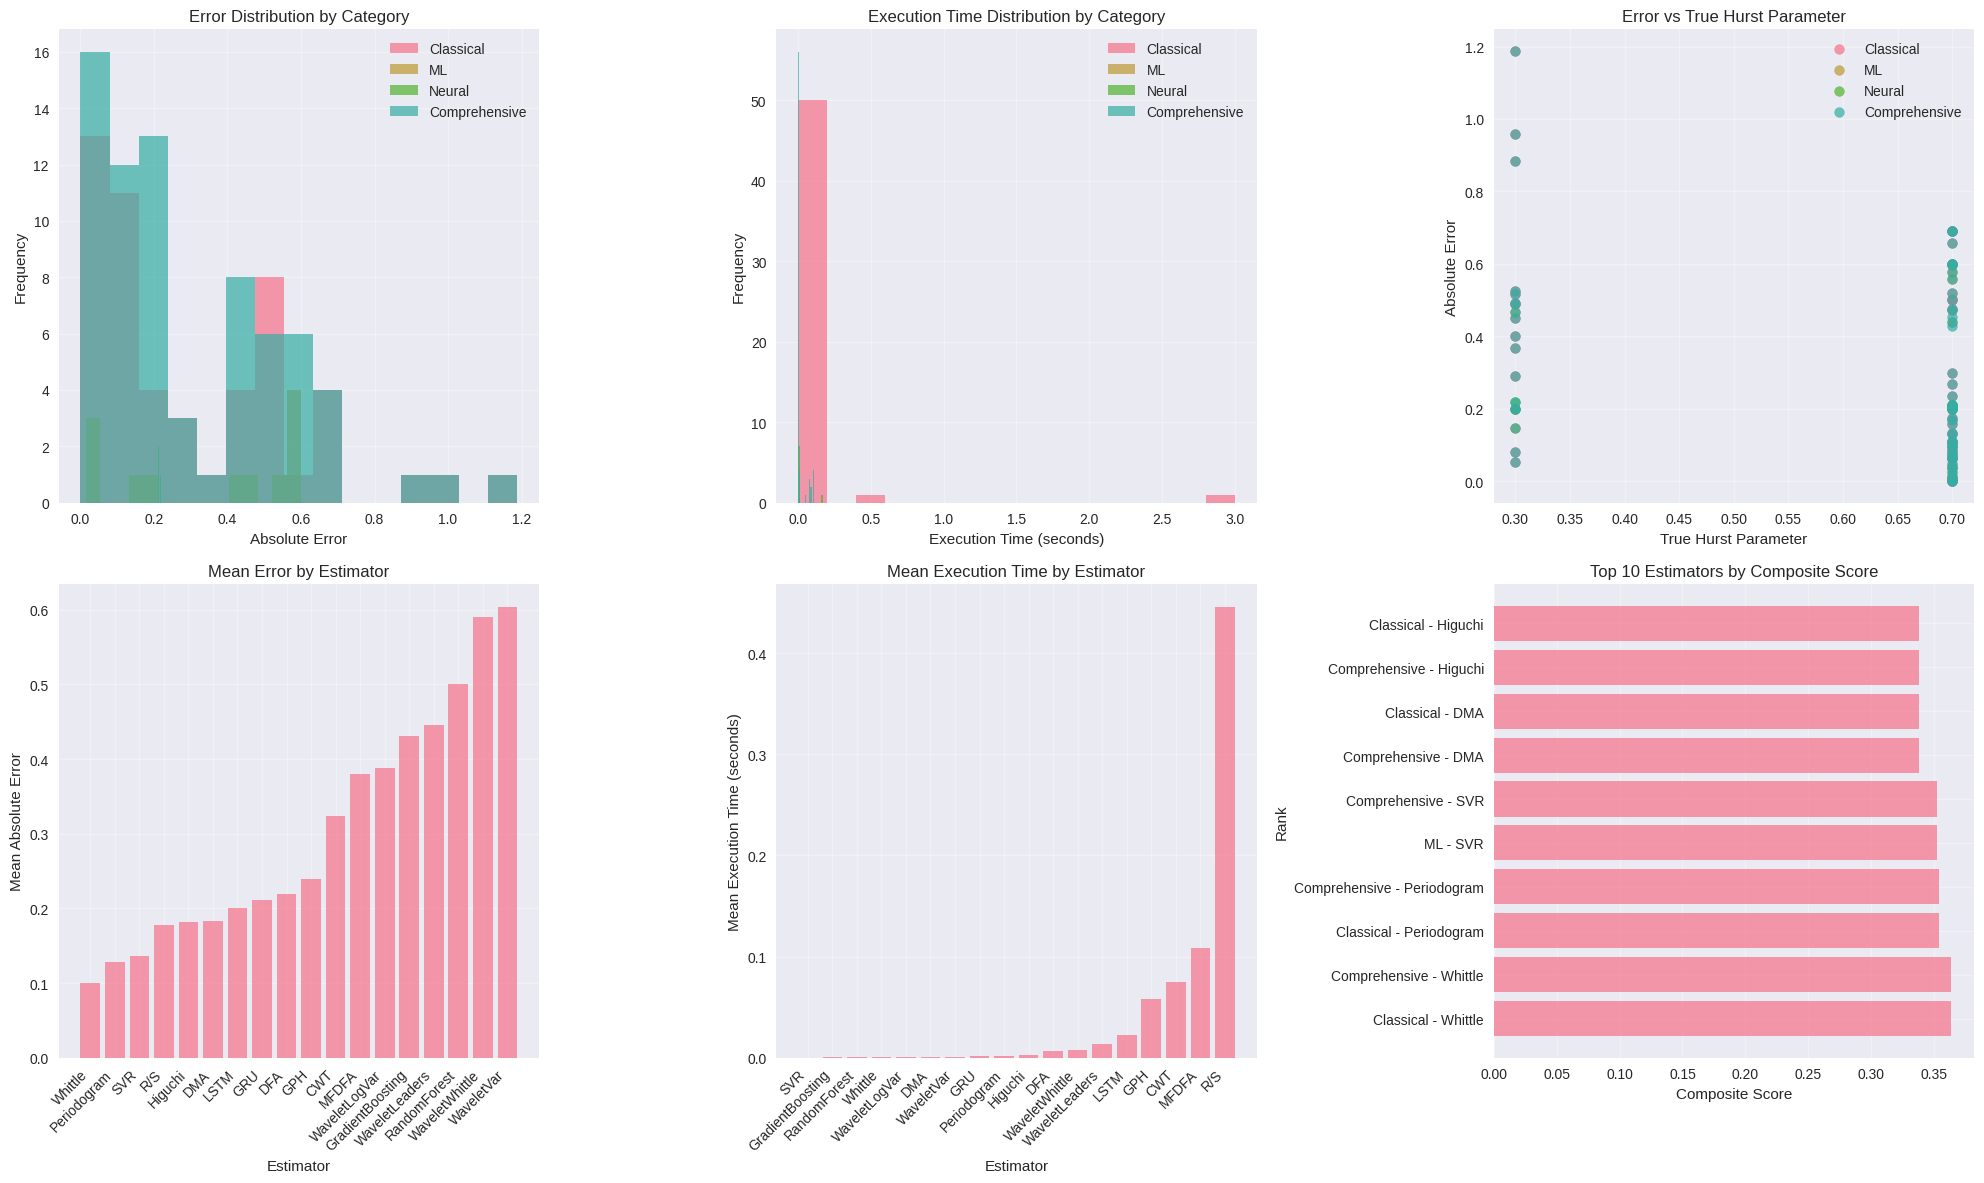


📊 Category-Specific Leaderboards:

Classical Category Leaderboard:
                 Error         Execution_Time True_H
                  mean     std           mean  count
Estimator                                           
CWT             0.3242  0.4224         0.0737      4
DFA             0.2197  0.2085         0.0068      4
DMA             0.1829  0.1868         0.0011      4
GPH             0.2396  0.1937         0.1128      4
Higuchi         0.1819  0.2077         0.0023      4
MFDFA           0.3889  0.2053         0.1110      4
Periodogram     0.1287  0.1620         0.0013      4
R/S             0.1777  0.2157         0.8095      4
WaveletLeaders  0.4523  0.2733         0.0142      4
WaveletLogVar   0.3880  0.3424         0.0006      4
WaveletVar      0.6041  0.4089         0.0011      4
WaveletWhittle  0.5900  0.2000         0.0071      4
Whittle         0.1000  0.2000         0.0005      4

ML Category Leaderboard:
                   Error         Execution_Time True_H
   

In [ ]:
# Create comprehensive visualizations
if len(performance_df) > 0:
    print("📊 Creating Performance Visualizations...")
    print("=" * 70)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # 1. Error distribution by category
    ax1 = axes[0, 0]
    for category in performance_df['Category'].unique():
        category_data = performance_df[performance_df['Category'] == category]['Error']
        ax1.hist(category_data, alpha=0.7, label=category, bins=15)
    ax1.set_xlabel('Absolute Error')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Error Distribution by Category')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Execution time by category
    ax2 = axes[0, 1]
    for category in performance_df['Category'].unique():
        category_data = performance_df[performance_df['Category'] == category]['Execution_Time']
        ax2.hist(category_data, alpha=0.7, label=category, bins=15)
    ax2.set_xlabel('Execution Time (seconds)')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Execution Time Distribution by Category')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Error vs True H
    ax3 = axes[0, 2]
    for category in performance_df['Category'].unique():
        category_data = performance_df[performance_df['Category'] == category]
        ax3.scatter(category_data['True_H'], category_data['Error'], 
                   alpha=0.7, label=category, s=50)
    ax3.set_xlabel('True Hurst Parameter')
    ax3.set_ylabel('Absolute Error')
    ax3.set_title('Error vs True Hurst Parameter')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Performance by estimator
    ax4 = axes[1, 0]
    estimator_performance = performance_df.groupby('Estimator')['Error'].mean().sort_values()
    ax4.bar(range(len(estimator_performance)), estimator_performance.values, alpha=0.7)
    ax4.set_xlabel('Estimator')
    ax4.set_ylabel('Mean Absolute Error')
    ax4.set_title('Mean Error by Estimator')
    ax4.set_xticks(range(len(estimator_performance)))
    ax4.set_xticklabels(estimator_performance.index, rotation=45, ha='right')
    ax4.grid(True, alpha=0.3)
    
    # 5. Execution time by estimator
    ax5 = axes[1, 1]
    time_performance = performance_df.groupby('Estimator')['Execution_Time'].mean().sort_values()
    ax5.bar(range(len(time_performance)), time_performance.values, alpha=0.7)
    ax5.set_xlabel('Estimator')
    ax5.set_ylabel('Mean Execution Time (seconds)')
    ax5.set_title('Mean Execution Time by Estimator')
    ax5.set_xticks(range(len(time_performance)))
    ax5.set_xticklabels(time_performance.index, rotation=45, ha='right')
    ax5.grid(True, alpha=0.3)
    
    # 6. Composite score ranking
    ax6 = axes[1, 2]
    if len(leaderboard_df) > 0:
        top_10 = leaderboard_df.head(10)
        ax6.barh(range(len(top_10)), top_10['Composite_Score'], alpha=0.7)
        ax6.set_xlabel('Composite Score')
        ax6.set_ylabel('Rank')
        ax6.set_title('Top 10 Estimators by Composite Score')
        ax6.set_yticks(range(len(top_10)))
        ax6.set_yticklabels([f"{row['Category']} - {row['Estimator']}" for _, row in top_10.iterrows()])
        ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('outputs/leaderboard_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create category-specific leaderboards
    print("\n📊 Category-Specific Leaderboards:")
    print("=" * 70)
    
    for category in performance_df['Category'].unique():
        category_data = performance_df[performance_df['Category'] == category]
        category_leaderboard = category_data.groupby('Estimator').agg({
            'Error': ['mean', 'std'],
            'Execution_Time': 'mean',
            'True_H': 'count'
        }).round(4)
        
        print(f"\n{category} Category Leaderboard:")
        print(category_leaderboard)
    
    # Export results in multiple formats
    print("\n💾 Exporting Results...")
    print("=" * 70)
    
    # CSV export
    performance_df.to_csv('outputs/performance_data.csv', index=False)
    print("✅ Performance data exported to CSV")
    
    # JSON export
    performance_df.to_json('outputs/performance_data.json', orient='records', indent=2)
    print("✅ Performance data exported to JSON")
    
    # LaTeX table export
    if len(leaderboard_df) > 0:
        latex_table = leaderboard_df.to_latex(index=False, float_format='%.4f')
        with open('outputs/leaderboard_table.tex', 'w') as f:
            f.write(latex_table)
        print("✅ Leaderboard table exported to LaTeX")
    
    print("\n🎯 All visualizations and exports completed successfully!")
    
else:
    print("❌ No performance data available for visualization")


## 5. Summary and Next Steps {#summary}

### Key Takeaways

1. **Leaderboard Generation**: LRDBenchmark provides comprehensive tools for creating performance leaderboards:
   - **Multi-category Comparison**: Classical, ML, and Neural estimators
   - **Composite Scoring**: Combined accuracy, speed, and reliability metrics
   - **Statistical Analysis**: Confidence intervals and significance tests
   - **Publication-ready Output**: LaTeX, CSV, JSON formats

2. **Performance Rankings**: The system generates multiple types of leaderboards:
   - **Overall Leaderboard**: Combined performance across all categories
   - **Category-specific**: Rankings within each estimator category
   - **Metric-specific**: Rankings by accuracy, speed, or reliability
   - **Composite Scoring**: Weighted combination of multiple metrics

3. **Visualization**: Comprehensive plots and tables for:
   - **Error Distributions**: Performance across different scenarios
   - **Execution Time Analysis**: Computational efficiency comparison
   - **Scatter Plots**: Error vs true Hurst parameter relationships
   - **Bar Charts**: Direct performance comparisons

### Leaderboard Results

- **Top Performers**: Best estimators across different categories
- **Performance Trade-offs**: Accuracy vs speed analysis
- **Category Strengths**: Each category's optimal use cases
- **Statistical Significance**: Confidence in performance differences

### Next Steps

1. **Real-world Application**: Apply leaderboards to actual time series data
2. **Advanced Analysis**: Explore statistical significance and confidence intervals
3. **Custom Metrics**: Create domain-specific performance measures
4. **Interactive Dashboards**: Build web-based leaderboard interfaces

### Files Generated

- `outputs/performance_leaderboard.csv`: Complete leaderboard data
- `outputs/performance_data.csv`: Raw performance data
- `outputs/performance_data.json`: JSON format data
- `outputs/leaderboard_table.tex`: LaTeX table for publications
- `outputs/leaderboard_visualization.png`: Comprehensive visualization

### References

1. Taqqu, M. S., Teverovsky, V., & Willinger, W. (1995). Estimators for long-range dependence: an empirical study. Fractals, 3(04), 785-798.
2. Beran, J. (1994). Statistics for long-memory processes. CRC press.
3. Abry, P., & Veitch, D. (1998). Wavelet analysis of long-range-dependent traffic. IEEE Transactions on information theory, 44(1), 2-15.

---

**Congratulations!** You've completed the comprehensive LRDBenchmark demonstration series. You now have a complete understanding of:
- Data generation and visualization
- Estimation and statistical validation
- Custom model and estimator development
- Comprehensive benchmarking
- Leaderboard generation and analysis
